# Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import surprise
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import train_test_split, GridSearchCV
from surprise.prediction_algorithms import KNNBasic, SVD, NMF
import warnings

warnings.filterwarnings("ignore")

# Read CSV

In [53]:
df_books = pd.read_csv(r'C:\Users\hp\Documents\ai_assignment\csvs\Books.csv')
df_ratings = pd.read_csv(r'C:\Users\hp\Documents\ai_assignment\csvs\Ratings.csv')
df_users = pd.read_csv(r'C:\Users\hp\Documents\ai_assignment\csvs\Users.csv')

# EDA

In [54]:
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [55]:
df_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [56]:
df_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


# 1. Number of Columns and Rows

In [57]:
print(df_books.shape)
print(df_ratings.shape)
print(df_users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


# 2. Data Types

In [58]:
print(df_books.dtypes)

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object


Suppose Year-Of-Publication is int type, Year-Of-Publication consists of:
1) NaN value
2) 0 value
3) non-numeric value

Solution:
Convert NaN and non-numeric values to 0 (to be handled later), then convertion to int data type

In [59]:
# 1. Fill NaN with 0
df_books['Year-Of-Publication'].fillna(0, inplace=True)

# 2. Fill non-numeric value with 0
nn_rows = pd.to_numeric(df_books['Year-Of-Publication'], errors='coerce').isna()
df_books.loc[nn_rows, 'Year-Of-Publication'] = 0

# 3. Convert to int
df_books['Year-Of-Publication'] = df_books['Year-Of-Publication'].astype(int)

In [60]:
# Check is successfully converted
print(df_books.dtypes)

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int32
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object


In [61]:
print(df_ratings.dtypes)

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object


In [62]:
print(df_users.dtypes)

User-ID       int64
Location     object
Age         float64
dtype: object


# 3. Descriptive Statistic

In [63]:
df_books.describe(include = 'all')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360.000000,271358,271360,271360,271357
unique,271360,242135,102022,NaN,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,NaN,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,NaN,7535,2,2,2
mean,NaN,NaN,NaN,1959.739151,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,258.075075,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1989.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1995.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2000.000000,NaN,NaN,NaN,NaN


Useful Insight:
1. 'Selected Poems' has the most copy
2. Agatha Christie has written the most books
3. Most of the book publish around the year 2000
4. There are outliers in Year-Of-Publication (0 and year > 2024)
4. Harlequin published most of the books

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'Selected Poems'),
  Text(1, 0, 'Little Women'),
  Text(2, 0, 'Wuthering Heights'),
  Text(3, 0, 'The Secret Garden'),
  Text(4, 0, 'Dracula'),
  Text(5, 0, 'Adventures of Huckleberry Finn'),
  Text(6, 0, 'Jane Eyre'),
  Text(7, 0, 'The Night Before Christmas'),
  Text(8, 0, 'Pride and Prejudice'),
  Text(9, 0, 'Great Expectations'),
  Text(10, 0, 'Masquerade'),
  Text(11, 0, 'Black Beauty'),
  Text(12, 0, 'Frankenstein'),
  Text(13, 0, 'The Gift'),
  Text(14, 0, 'Emma'),
  Text(15, 0, 'Beloved'),
  Text(16, 0, 'Nemesis'),
  Text(17, 0, 'Illusions'),
  Text(18, 0, 'Psychology'),
  Text(19, 0, 'Journey'),
  Text(20, 0, 'The Wedding'),
  Text(21, 0, 'Robinson Crusoe'),
  Text(22, 0, 'The Secret'),
  Text(23, 0, 'Fahrenheit 451'),
  Text(24, 0, 'Legacy'),
  Text(25, 0, 'Dinosaurs'),
  Text(26, 0, 'Heidi'),
 

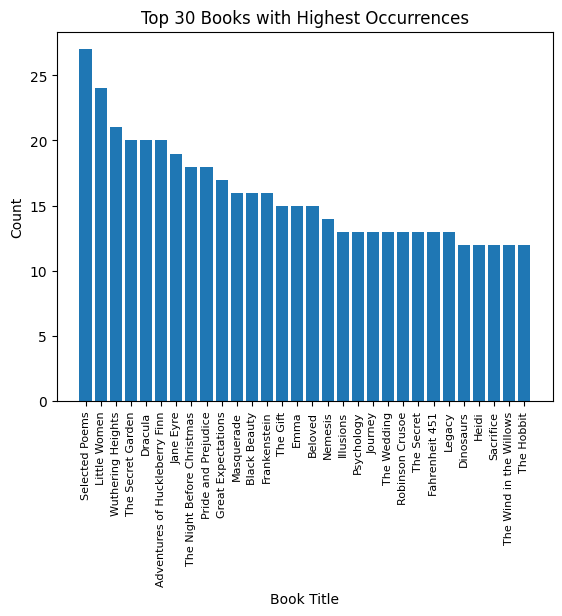

In [64]:
# Visualise 1.
book_counts = df_books['Book-Title'].value_counts()
df_book_counts = pd.DataFrame({'Book Title': book_counts.head(30).index, 'Count': book_counts.head(30).values})
plt.bar(df_book_counts['Book Title'], df_book_counts['Count'])
plt.title('Top 30 Books with Highest Occurrences')
plt.xlabel('Book Title')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=8)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'Agatha Christie'),
  Text(1, 0, 'William Shakespeare'),
  Text(2, 0, 'Stephen King'),
  Text(3, 0, 'Ann M. Martin'),
  Text(4, 0, 'Carolyn Keene'),
  Text(5, 0, 'Francine Pascal'),
  Text(6, 0, 'Isaac Asimov'),
  Text(7, 0, 'Nora Roberts'),
  Text(8, 0, 'Barbara Cartland'),
  Text(9, 0, 'Charles Dickens'),
  Text(10, 0, 'Not Applicable (Na )'),
  Text(11, 0, 'R. L. Stine'),
  Text(12, 0, 'Mark Twain'),
  Text(13, 0, 'Jane Austen'),
  Text(14, 0, 'Terry Pratchett'),
  Text(15, 0, 'Mary Higgins Clark'),
  Text(16, 0, 'Piers Anthony'),
  Text(17, 0, 'Marion Zimmer Bradley'),
  Text(18, 0, 'Janet Dailey'),
  Text(19, 0, 'Franklin W. Dixon'),
  Text(20, 0, 'Roald Dahl'),
  Text(21, 0, 'J. R. R. Tolkien'),
  Text(22, 0, 'Tom Clancy'),
  Text(23, 0, 'Dick Francis'),
  Text(24, 0, 'Danielle Steel'),
  Text(25, 0

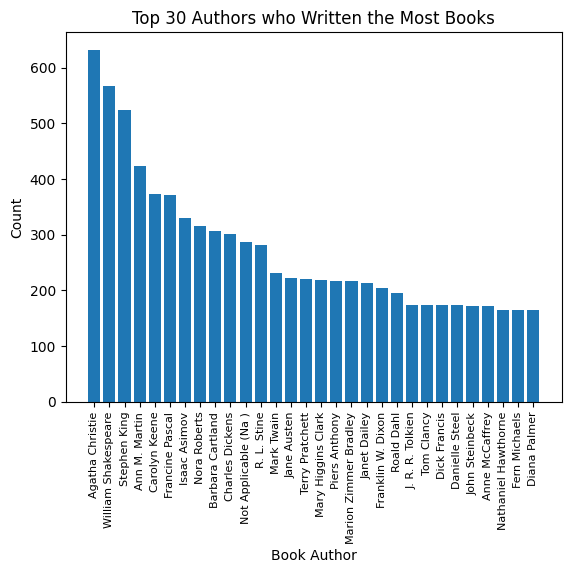

In [65]:
# Visualise 2.
author_counts = df_books['Book-Author'].value_counts()
df_author_counts = pd.DataFrame({'Book Author': author_counts.head(30).index, 'Count': author_counts.head(30).values})
plt.bar(df_author_counts['Book Author'], df_author_counts['Count'])
plt.title('Top 30 Authors who Written the Most Books')
plt.xlabel('Book Author')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=8)

Text(0, 0.5, 'Frequency')

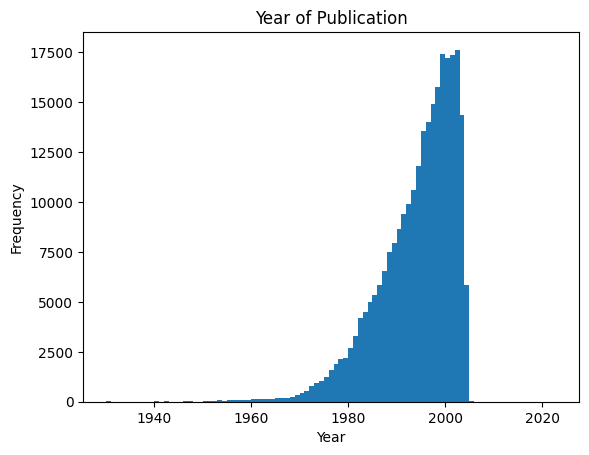

In [66]:
# Visualise 3.

# Here I temeprorily remove the rows with year = 0 and year >= 2024 so that
# I can see a clearer picture of the distrubution
df_books_temp = df_books[df_books['Year-Of-Publication'] != 0]
df_books_temp = df_books_temp[df_books_temp['Year-Of-Publication'] < 2024]

plt.hist(df_books_temp['Year-Of-Publication'], bins = np.arange(1930, 2024, 1))
plt.title('Year of Publication')
plt.xlabel('Year')
plt.ylabel('Frequency')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'Harlequin'),
  Text(1, 0, 'Silhouette'),
  Text(2, 0, 'Pocket'),
  Text(3, 0, 'Ballantine Books'),
  Text(4, 0, 'Bantam Books'),
  Text(5, 0, 'Scholastic'),
  Text(6, 0, 'Simon &amp; Schuster'),
  Text(7, 0, 'Penguin Books'),
  Text(8, 0, 'Berkley Publishing Group'),
  Text(9, 0, 'Warner Books'),
  Text(10, 0, 'Penguin USA'),
  Text(11, 0, 'Harpercollins'),
  Text(12, 0, 'Fawcett Books'),
  Text(13, 0, 'Signet Book'),
  Text(14, 0, 'Random House Inc'),
  Text(15, 0, 'St Martins Pr'),
  Text(16, 0, "St. Martin's Press"),
  Text(17, 0, 'Tor Books'),
  Text(18, 0, 'HarperCollins Publishers'),
  Text(19, 0, 'Zebra Books'),
  Text(20, 0, 'Bantam'),
  Text(21, 0, 'Avon'),
  Text(22, 0, 'Jove Books'),
  Text(23, 0, 'Vintage Books USA'),
  Text(24, 0, 'Oxford University Press'),
  Text(25, 0, 'Dell Publishing Co

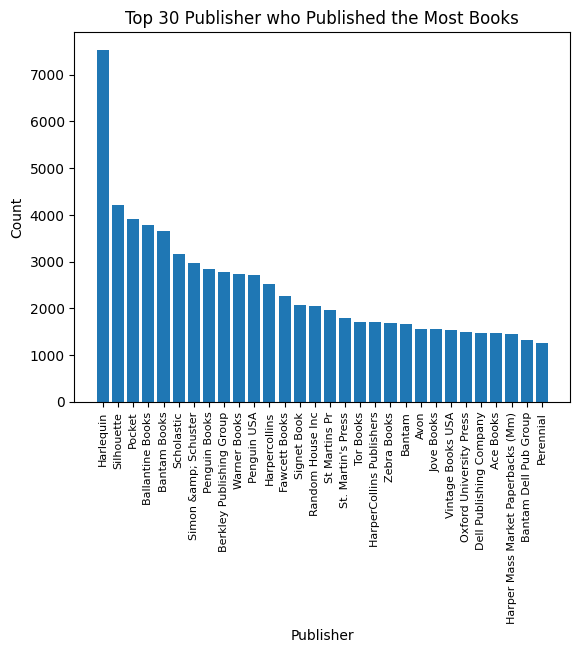

In [67]:
# Visualise 5.
publisher_counts = df_books['Publisher'].value_counts()
df_publisher_counts = pd.DataFrame({'Publisher': publisher_counts.head(30).index, 'Count': publisher_counts.head(30).values})
plt.bar(df_publisher_counts['Publisher'], df_publisher_counts['Count'])
plt.title('Top 30 Publisher who Published the Most Books')
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=8)

In [68]:
df_ratings.describe(include = 'all')

,User-ID,ISBN,Book-Rating
count,1.149780e+06,1149780,1.149780e+06
unique,NaN,340556,NaN
top,NaN,0971880107,NaN
freq,NaN,2502,NaN
mean,1.403864e+05,NaN,2.866950e+00
std,8.056228e+04,NaN,3.854184e+00
min,2.000000e+00,NaN,0.000000e+00
25%,7.034500e+04,NaN,0.000000e+00
50%,1.410100e+05,NaN,0.000000e+00
75%,2.110280e+05,NaN,7.000000e+00


Im interested in knowing:
1. Rating distribution by book
2. Rating distribution by user

In [69]:
# Visualise 1
# Since rating = 0 is not in the defined scale for rating, we first temperately
# remove them to see a clearer picture

# 1. Remove rating = 0 rows
df_ratings_temp = df_ratings[df_ratings['Book-Rating'] != 0]

# 2. Group ratings by book (ISBN)
grouped_ratings = df_ratings_temp.groupby('ISBN')

# 3. Count how many ratings given to each books
ratings_count = grouped_ratings.size()

# 4. Calculate average ratings for each book
average_ratings = grouped_ratings['Book-Rating'].mean()

# 3. Summarise into dataframe, and do sorting according to ratings count
df_ratings_sort = pd.DataFrame({'ratings_count': ratings_count, 'average_rating': average_ratings})
df_ratings_sort.sort_values(by='ratings_count', ascending=False, inplace=True)
df_ratings_sort.describe()

,ratings_count,average_rating
count,185973.000000,185973.000000
mean,2.331903,7.491347
std,6.834667,1.731428
min,1.000000,1.000000
25%,1.000000,6.500000
50%,1.000000,8.000000
75%,2.000000,9.000000
max,707.000000,10.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '0316666343'),
  Text(1, 0, '0971880107'),
  Text(2, 0, '0385504209'),
  Text(3, 0, '0312195516'),
  Text(4, 0, '0679781587'),
  Text(5, 0, '0060928336'),
  Text(6, 0, '059035342X'),
  Text(7, 0, '0142001740'),
  Text(8, 0, '0446672211'),
  Text(9, 0, '044023722X'),
  Text(10, 0, '0452282152'),
  Text(11, 0, '0316601950'),
  Text(12, 0, '0671027360'),
  Text(13, 0, '067976402X'),
  Text(14, 0, '0316769487'),
  Text(15, 0, '0786868716'),
  Text(16, 0, '0743418174'),
  Text(17, 0, '0345337662'),
  Text(18, 0, '0375727345'),
  Text(19, 0, '0312278586'),
  Text(20, 0, '0156027321'),
  Text(21, 0, '0060930535'),
  Text(22, 0, '0671021001'),
  Text(23, 0, '0446310786'),
  Text(24, 0, '0440226430'),
  Text(25, 0, '044021145X'),
  Text(26, 0, '0671003755'),
  Text(27, 0, '043935806X'),
  Text(28, 0, '0446605239'),
  Text(29, 0, '0345370775')])

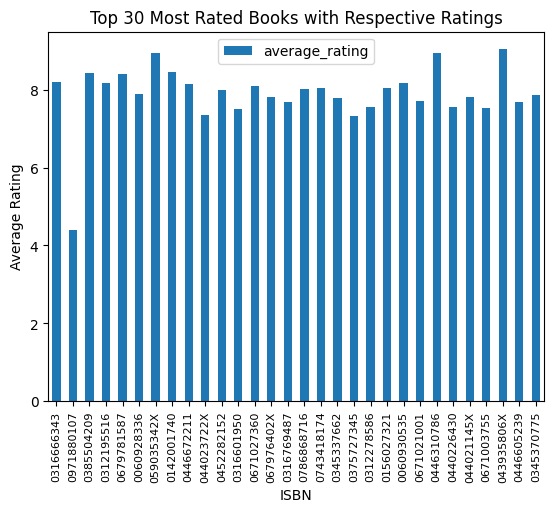

In [70]:
# Visualise top 30 most rated books
top_books = df_ratings_sort.head(30)
top_books.plot(kind='bar', y='average_rating')
plt.title('Top 30 Most Rated Books with Respective Ratings')
plt.xlabel('ISBN')
plt.ylabel('Average Rating')
plt.xticks(rotation=90, fontsize=8)

In [71]:
# Visualise 2

# 1. Group ratings by user (User-ID)
grouped_users = df_ratings_temp.groupby('User-ID')

# 2. Count how many ratings given by each user
user_ratings_count = grouped_users.size()

# 3. Summarise into dataframe, and do sorting according to ratings count
df_user_ratings_sort = pd.DataFrame({'User-ID': user_ratings_count.index, 'ratings_count': user_ratings_count.values})
df_user_ratings_sort.sort_values(by='ratings_count', ascending=False, inplace=True)
df_user_ratings_sort.reset_index(drop=True, inplace=True)  
df_user_ratings_sort.describe()

,User-ID,ratings_count
count,77805.000000,77805.000000
mean,139243.292822,5.573819
std,80566.100538,44.001879
min,8.000000,1.000000
25%,69124.000000,1.000000
50%,138698.000000,1.000000
75%,209191.000000,3.000000
max,278854.000000,8524.000000


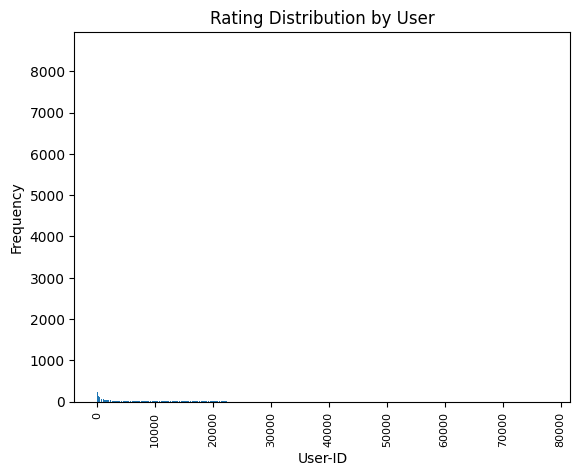

In [72]:
# Rating distribution by user
plt.bar(df_user_ratings_sort.index, df_user_ratings_sort['ratings_count'])
plt.title('Rating Distribution by User')
plt.xlabel('User-ID')
plt.ylabel('Frequency')
plt.xticks(rotation=90, fontsize=8)
plt.show()

In [73]:
df_users.describe(include = 'all')

,User-ID,Location,Age
count,278858.00000,278858,168096.000000
unique,NaN,57339,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.50000,NaN,34.751434
std,80499.51502,NaN,14.428097
min,1.00000,NaN,0.000000
25%,69715.25000,NaN,24.000000
50%,139429.50000,NaN,32.000000
75%,209143.75000,NaN,44.000000


Useful Insight:
1. Most of the users are from London
2. Most of the users around the age of 34
3. There are outliers in the age 

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'london, england, united kingdom'),
  Text(1, 0, 'toronto, ontario, canada'),
  Text(2, 0, 'sydney, new south wales, australia'),
  Text(3, 0, 'melbourne, victoria, australia'),
  Text(4, 0, 'portland, oregon, usa'),
  Text(5, 0, 'chicago, illinois, usa'),
  Text(6, 0, 'seattle, washington, usa'),
  Text(7, 0, 'new york, new york, usa'),
  Text(8, 0, 'madrid, madrid, spain'),
  Text(9, 0, 'vancouver, british columbia, canada'),
  Text(10, 0, 'san diego, california, usa'),
  Text(11, 0, 'san francisco, california, usa'),
  Text(12, 0, 'ottawa, ontario, canada'),
  Text(13, 0, 'houston, texas, usa'),
  Text(14, 0, 'berlin, berlin, germany'),
  Text(15, 0, 'milano, lombardia, italy'),
  Text(16, 0, 'los angeles, california, usa'),
  Text(17, 0, 'austin, texas, usa'),
  Text(18, 0, 'calgary, alberta, canada')

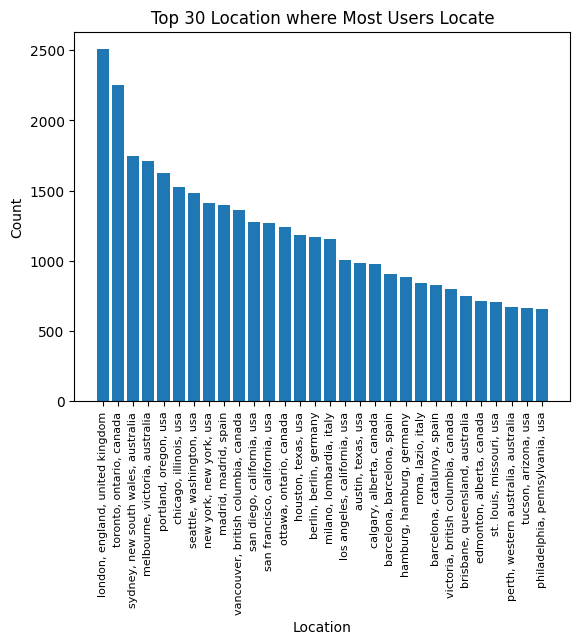

In [74]:
# Visualise 1.
location_counts = df_users['Location'].value_counts()
df_location_counts = pd.DataFrame({'Location': location_counts.head(30).index, 'Count': location_counts.head(30).values})
plt.bar(df_location_counts['Location'], df_location_counts['Count'])
plt.title('Top 30 Location where Most Users Locate')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=8)

Text(0, 0.5, 'Frequency')

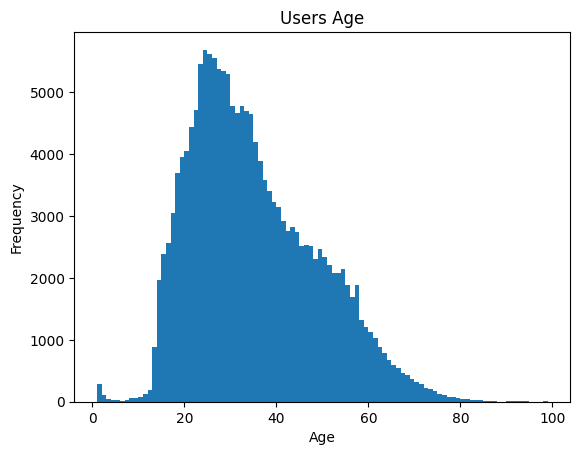

In [75]:
# Visualise 2.

# Here I temporarily remove the rows with age=0 and age > 100 so that
# I can see a clearer picture of the distribution
df_users_temp = df_users[df_users['Age'] != 0]
df_users_temp = df_users_temp[df_users_temp['Age'] <= 100]

plt.hist(df_users_temp['Age'], bins = np.arange(1, 100, 1))
plt.title('Users Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 4. Unique Data

For books dataset: Check if every ISNB is unique, and check whether there are books with same name but different ISNB

For ratings dataset: Check if any books rated more than once by the same users

For users dataset: Check if every user id is unique

In [76]:
# 1. Books (total count = 271360)
df_books['ISBN'].nunique()

271360

In [77]:
df_books['Book-Title'].nunique()

242135

Comment: Based on the observations above, it's evident that multiple books share the same title but have different ISBNs. This discrepancy could be attributed to variations in authors, publication years, or publishers. Additionally, there might be instances where books share the same title, author, publication year, and publisher, yet still possess different ISBNs due to differences in versions, such as language or formatting. Given the uncertainty surrounding the reasons for these discrepancies, I've chosen not to remove any books from the dataset, so to prevent losing any important insight.

In [78]:
# 2. Ratings
duplicated_ratings = df_ratings.duplicated(['User-ID', 'ISBN'])
print(df_ratings[duplicated_ratings])

Empty DataFrame
Columns: [User-ID, ISBN, Book-Rating]
Index: []


In [79]:
# 3. Users (total count = 278858)
df_users['User-ID'].nunique()

278858

# 5. Missing Data

In [80]:
df_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [81]:
# Check if any Year-Of-Publication = 0
books_with_year_zero = df_books[df_books['Year-Of-Publication'] == 0]
print(len(books_with_year_zero))

4621


All books features are not significance to the following implementation, hence they will not be handled

In [82]:
df_ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [83]:
# Check if user id = 0
users_with_id_zero = df_users[df_users['User-ID'] == 0]
print(len(users_with_id_zero))

0


In [84]:
# Check if isbn = 0
books_with_isbn_zero = df_ratings[df_ratings['ISBN'] == 0]
print(len(books_with_isbn_zero))

0


In [85]:
# Check if rating = 0
zero_ratings = df_ratings[df_ratings['Book-Rating'] == 0]
print(len(zero_ratings))

716109


Implicit rating is expressed by 0, which is something that not in our concern. We only focus on explicit rating in the scale of 1 to 10. Hence, 0 rating rows will be removed after merging tables

In [86]:
df_users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

User age is not significance to the following implementation, hence they will not be handled

# Merging Dataset and Feature Selection

In [87]:
# Merging ratings and books, except for book-title, all columns from books dataset are dropped
df_ratings_books = df_ratings.merge(df_books, on = 'ISBN').drop(columns = ['Book-Author','Year-Of-Publication','Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis = 1)

In [88]:
# Merging ratings_books with users, users' location and age will be dropped
df_final_raw = df_ratings_books.merge(df_users, on = 'User-ID').drop(columns = ['Location', 'Age'], axis = 1)

In [89]:
df_final_raw.head()

,User-ID,ISBN,Book-Rating,Book-Title
0,276725,034545104X,0,Flesh Tones: A Novel
1,276726,0155061224,5,Rites of Passage
2,276727,0446520802,0,The Notebook
3,276729,052165615X,3,Help!: Level 1
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...


In [90]:
df_final_raw.shape

(1031136, 4)

In [91]:
# check if any columns has empty data
df_final_raw.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
Book-Title     0
dtype: int64

In [92]:
# Check if isbn = 0
books_with_isbn_zero = df_final_raw[df_final_raw['ISBN'] == 0]
print(len(books_with_isbn_zero))

0


In [93]:
# Check if rating = 0
zero_ratings = df_final_raw[df_final_raw['Book-Rating'] == 0]
print(len(zero_ratings))

647294


# Cleaning Dataset

As Mentioned before, Implicit rating with the value 0 will be removed as they are not our concern

In [94]:
df_final = df_final_raw[df_final_raw['Book-Rating'] > 0]

In [95]:
df_final.shape

(383842, 4)

In [96]:
df_final.head()

,User-ID,ISBN,Book-Rating,Book-Title
1,276726,0155061224,5,Rites of Passage
3,276729,052165615X,3,Help!: Level 1
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...
6,276744,038550120X,7,A Painted House
13,276747,0060517794,9,Little Altars Everywhere


# Dimensionality Reduction

Dataset is too large, We have to reduce the dimension by filter and keep only users who rated 3 books and above, because 75 % of the rated users rates more than 3 books, to reduce biasness by focusing on the majority

In [97]:
# 1. Count how many books does users rated
users_rating_count = df_final.groupby('User-ID')['Book-Rating'].count()

# 2. Find knowledgeable users
knowledgeable_users = users_rating_count[users_rating_count >= 3].index

# 3. Filter users
df_final_reduced = df_final[df_final['User-ID'].isin(knowledgeable_users)]

In [98]:
df_final_reduced.shape

(327271, 4)

# Train Test Split

In [114]:
df_final_reduced[['User-ID','ISBN','Book-Rating']].to_csv('cf_final.csv', index=False)

In [100]:
# Convert df to Surprise object
reader = Reader(rating_scale=(1, 10))
final_dataset = Dataset.load_from_df(df_final_reduced[['User-ID','ISBN','Book-Rating']], reader)

# Split according to 8:2 ratio
train_set, test_set = train_test_split(final_dataset, test_size = 0.2)

# Cross Validation

Before training models, I decided to perform grid search cv to find out the best parameters for KNN model

In [102]:
# param_grid = {
#     'sim_options' : {'name': ['cosine', 'pearson']}, 
#     'user_based' : [True],
#     'k': [20, 50, 100]
# }
# 
# grid_search = GridSearchCV(KNNBasic, param_grid, measures = ['rmse', 'mae'], cv = 5)
# grid_search.fit(final_dataset)
# 
# print(grid_search.best_params)

Conclusion: I decided to consider result from rmse as rmse penalizes larger errors more heavily than MAE, which will contribute to more accurate result. Hence, similarities metrix = pearson and k = 100 will be chosen

# Model Building

In [103]:
#1. KNN Basic 
# Use Pearson Similarities, number of neighbour k = 100
sim_option = { 'name' : 'pearson', 'user_based' : True}
model_knn_basic = KNNBasic(k = 100, sim_option=sim_option)
predictions_knn_basic = model_knn_basic.fit(train_set).test(test_set)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [104]:
#2. SVD
model_svd = SVD()
predictions_svd = model_svd.fit(train_set).test(test_set)

In [105]:
#3. NMF 
model_nmf = NMF()
predictions_nmf = model_nmf.fit(train_set).test(test_set)

# Model Evaluation

In [106]:
#1. KNN Basic
rmse_knn_basic = accuracy.rmse(predictions_knn_basic)
mae_knn_basic = accuracy.mae(predictions_knn_basic)

RMSE: 1.9499
MAE:  1.5359


In [107]:
#2. SVD
rmse_svd = accuracy.rmse(predictions_svd)
mae_svd = accuracy.mae(predictions_svd)

RMSE: 1.6121
MAE:  1.2420


In [108]:
#3. NMF
rmse_nmf = accuracy.rmse(predictions_nmf)
mae_nmf = accuracy.mae(predictions_nmf)

RMSE: 2.5038
MAE:  2.0964


Conclusion: Use SVD

# Function to Generate Prediction

In [109]:
def get_recommendations(user_id):
    # 1. Find out all predictions made to this user
    ratings_prediction = [pred for pred in predictions_svd if pred.uid == user_id]
    # 2. Sort in descending order from highest to lowest
    sorted_predictions = sorted(ratings_prediction, key=lambda x: x.est, reverse = True)
    # 3. Extract top 10 books ISBN
    top_10_books_isbn = [pred.iid for pred in sorted_predictions [:10]]
    # 4. Return books info for these 10 books
    df_recommended_books = df_books[df_books['ISBN'].isin(top_10_books_isbn)]

    return df_recommended_books

In [110]:
get_recommendations(76499)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
389,0380012863,Jonathan Livingston Seagull,Richard Bach,1976,Avon,http://images.amazon.com/images/P/0380012863.0...,http://images.amazon.com/images/P/0380012863.0...,http://images.amazon.com/images/P/0380012863.0...
1024,0394820371,The Phantom Tollbooth,Norton Juster,1993,Yearling Books,http://images.amazon.com/images/P/0394820371.0...,http://images.amazon.com/images/P/0394820371.0...,http://images.amazon.com/images/P/0394820371.0...
1101,0060256672,Where the Sidewalk Ends : Poems and Drawings,Shel Silverstein,1974,HarperCollins,http://images.amazon.com/images/P/0060256672.0...,http://images.amazon.com/images/P/0060256672.0...,http://images.amazon.com/images/P/0060256672.0...
1312,0553296981,Anne Frank: The Diary of a Young Girl,ANNE FRANK,1993,Bantam,http://images.amazon.com/images/P/0553296981.0...,http://images.amazon.com/images/P/0553296981.0...,http://images.amazon.com/images/P/0553296981.0...
2991,0553213601,Cyrano De Bergerac (Bantam Classics),EDMOND ROSTAND,1950,Bantam,http://images.amazon.com/images/P/0553213601.0...,http://images.amazon.com/images/P/0553213601.0...,http://images.amazon.com/images/P/0553213601.0...
8237,0441172717,Dune (Remembering Tomorrow),Frank Herbert,1996,ACE Charter,http://images.amazon.com/images/P/0441172717.0...,http://images.amazon.com/images/P/0441172717.0...,http://images.amazon.com/images/P/0441172717.0...
49060,038531387X,Deliverance,JAMES DICKEY,1994,Delta,http://images.amazon.com/images/P/038531387X.0...,http://images.amazon.com/images/P/038531387X.0...,http://images.amazon.com/images/P/038531387X.0...
60618,0380727692,Poppy,Avi,1997,HarperTrophy,http://images.amazon.com/images/P/0380727692.0...,http://images.amazon.com/images/P/0380727692.0...,http://images.amazon.com/images/P/0380727692.0...
84789,044022702X,The Acorn People,Ron Jones,1996,Laurel-Leaf Books,http://images.amazon.com/images/P/044022702X.0...,http://images.amazon.com/images/P/044022702X.0...,http://images.amazon.com/images/P/044022702X.0...
90895,0525934855,Marilyn: The Last Take,Peter Harry Brown,1992,Penguin USA,http://images.amazon.com/images/P/0525934855.0...,http://images.amazon.com/images/P/0525934855.0...,http://images.amazon.com/images/P/0525934855.0...


# Function to Update Prediction

In [111]:
def update_recommendations(df_new, user_id):
    # 1. Concatenate datasets
    df_concatenated = pd.concat([df_final_reduced, df_new], axis = 0)
    df_concatenated.reset_index(drop = True, inplace = True)

    # 2. Convert to Surprise dataset
    concatenated_dataset = Dataset.load_from_df(df_concatenated[['User-ID','ISBN','Book-Rating']], reader)

    # 3. Perform train test split
    train_set, test_set = train_test_split(concatenated_dataset, test_size = 0.2)

    # 4. Retrain model
    predictions_svd = SVD().fit(train_set).test(test_set)

    # Make Prediction
    # 1. Find out all predictions made to this user
    ratings_prediction = [pred for pred in predictions_svd if pred.uid == user_id]
    
    # 2. Sort in descending order from highest to lowest
    sorted_predictions = sorted(ratings_prediction, key=lambda x: x.est, reverse = True)
    
    # 3. Extract top 10 books ISBN
    top_10_books_isbn = [pred.iid for pred in sorted_predictions [:10]]
    
    # 4. Return books info for these 10 books
    df_recommended_books = df_books[df_books['ISBN'].isin(top_10_books_isbn)]

    return df_recommended_books

In [112]:
# data = {
#     'User-ID' : [76499, 76499, 76499],
#     'ISBN' : ['0380012863', '0060921145', '0231073372'],
#     'Book-Rating' : [5, 6, 7]
# }

# df_haha = pd.DataFrame(data)

# df_haha

In [113]:
# update_recommendations(df_haha, 76499)

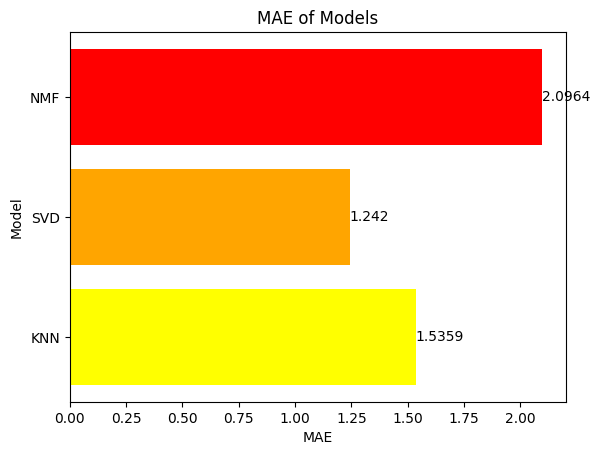

In [9]:
# Visualise MAE and RSME

# Data
models = ['KNN', 'SVD', 'NMF']
colors = ['yellow', 'orange', 'red']
maes = [1.5359, 1.2420, 2.0964]

# Plot
mae_bars = plt.barh(models, maes, color = colors)

# Adding labels and title
plt.xlabel('MAE')
plt.ylabel('Model')
plt.title('MAE of Models')
plt.bar_label(mae_bars)

# Show plot
plt.show()

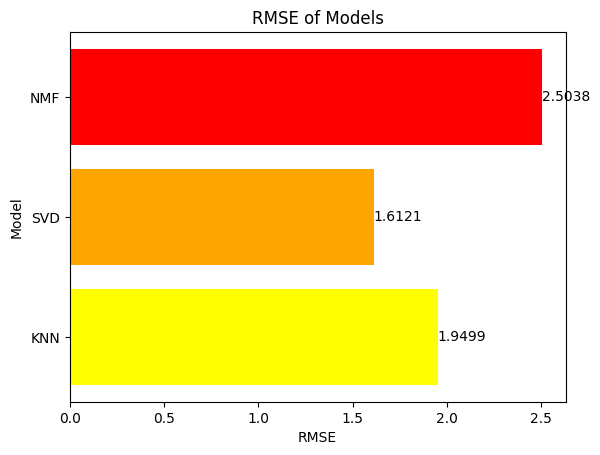

In [10]:
# Data
rmses = [1.9499, 1.6121, 2.5038]

# Plot
rmse_bars = plt.barh(models, rmses, color = colors)

# Adding labels and title
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.title('RMSE of Models')
plt.bar_label(rmse_bars)

# Show plot
plt.show()